In [1]:
# Base Imports

import operator
import random

from deap import base, gp, tools

# Requires installation of Graphviz-dev tool
import pygraphviz as pgv

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Defining a primitive set (Weak Type)
pset = gp.PrimitiveSet("main", 2) # name of the procedure generated, and its inputs

# Adding Operators to the Primitive Set
pset.addPrimitive(max, 2)      # add the max function as a primitive with 2 inputs
pset.addPrimitive(operator.add, 2) # add the addition operator (2 inputs)
pset.addPrimitive(operator.mul, 2) # add the mult operator (2 inputs)
pset.addPrimitive(operator.neg, 1) # add the negation operator (1 input)

# Adding Terminals to the Primitive Set
pset.renameArguments(ARG0="x") # Setting the input var name
pset.renameArguments(ARG1="y") # Setting the input var name
pset.addTerminal(1)            # Fixed value terminal

In [3]:
# Generating a Tree
expr = gp.genFull(pset, min_=1, max_=3) # Generates a rendom full tree from a terminal set
tree = gp.PrimitiveTree(expr)           # Tree constructor

print(tree)

add(add(1, y), add(1, 1))


In [4]:
# Tree Visualization
nodes, edges, labels = gp.graph(expr)

print(nodes)
print(edges)
print(labels)

[0, 1, 2, 3, 4, 5, 6]
[(0, 1), (1, 2), (1, 3), (0, 4), (4, 5), (4, 6)]
{0: 'add', 1: 'add', 2: 1, 3: 'y', 4: 'add', 5: 1, 6: 1}


In [5]:
# Graphviz

g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]
    
g.draw("tree.png")

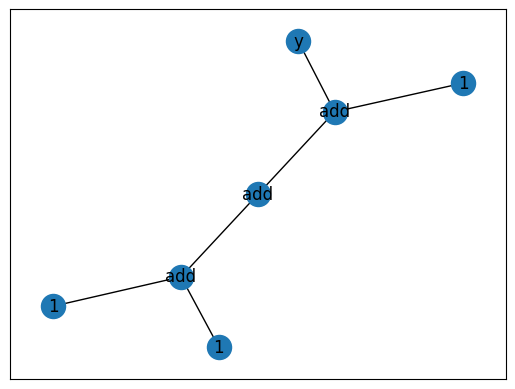

In [7]:
# Networkx

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
# pos = nx.graphviz_layout(g, prog="dot") Not working for some reason
pos = nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()

In [5]:
# Running a tree
tree_exec = gp.compile(tree, pset)

# Checking results:
print(tree_exec(1, 2)) # Remember we defined two inputs

48
